In [1]:
%run ../src/load_data.py

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.preprocessing import StandardScaler

%matplotlib inline

# General Stats on Original Data (Mean, Standard Deviation, Quartiles, Skew, Kurtosis)

In [2]:
housing_num_df = housing_df.select_dtypes(exclude=['category'])
stats = housing_num_df.describe().T
stats['skew'] = st.skew(housing_num_df)
stats['kurt'] = st.kurtosis(housing_num_df)
stats

,count,mean,std,min,25%,50%,75%,max,skew,kurt
LotFrontage,1451.0,70.031592,22.040937,21.0,60.0,70.049958,79.0,313.0,2.392802,21.843712
LotArea,1451.0,10507.808408,9992.987081,1300.0,7537.5,9477.000000,11600.0,215245.0,12.223089,202.879093
YearBuilt,1451.0,1971.092350,30.190266,1872.0,1954.0,1972.000000,2000.0,2010.0,-0.607592,-0.444982
YearRemodAdd,1451.0,1984.760165,20.651334,1950.0,1966.0,1993.000000,2004.0,2010.0,-0.495826,-1.279239
MasVnrArea,1451.0,103.756720,181.108150,0.0,0.0,0.000000,166.0,1600.0,2.665258,10.036234
BsmtFinSF1,1451.0,442.274983,455.369276,0.0,0.0,381.000000,707.0,5644.0,1.700822,11.250684
BsmtFinSF2,1451.0,46.838043,161.777324,0.0,0.0,0.000000,0.0,1474.0,4.235845,19.891761
BsmtUnfSF,1451.0,567.197105,442.209192,0.0,222.0,479.000000,808.0,2336.0,0.919025,0.469351
TotalBsmtSF,1451.0,1056.310131,437.914609,0.0,795.0,991.000000,1297.5,6110.0,1.533978,13.393706
FirstFlrSF,1451.0,1161.551344,385.002532,334.0,882.0,1086.000000,1391.0,4692.0,1.371722,5.808324


## Deskew with Log transformation and Standard Scale

In [3]:
def apply_scale(dataframe, scaling_function):
    numerical_df = dataframe.select_dtypes(include=[float])
    print(numerical_df.columns)
    numerical_df = scaling_function(numerical_df)
    tmp_df = dataframe.copy()
    tmp_df[numerical_df.columns] = numerical_df
    return tmp_df

def gelman_scale(dataframe):
    return (dataframe - dataframe.mean())/(2*dataframe.std())

In [5]:
housing_one_hot_df = pd.get_dummies(housing_df) 

scaler = StandardScaler()
housing_log_df = np.log(housing_one_hot_df + 1)
housing_gelman_df = apply_scale(housing_log_df, gelman_scale)
scaler.fit(housing_gelman_df)
stats_gelman = housing_gelman_df.describe().T
stats_gelman['skew'] = st.skew(housing_gelman_df)

stats_gelman.join(stats, lsuffix='-gelman', rsuffix='-orig')[['skew-orig', 'skew-gelman']]

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'FirstFlrSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=383)


,skew-orig,skew-gelman
LotFrontage,2.392802,-0.890042
LotArea,12.223089,-0.142304
YearBuilt,-0.607592,-0.635302
YearRemodAdd,-0.495826,-0.503263
MasVnrArea,2.665258,0.492764
BsmtFinSF1,1.700822,-0.617616
BsmtFinSF2,4.235845,2.509955
BsmtUnfSF,0.919025,-2.177593
TotalBsmtSF,1.533978,-5.140796
FirstFlrSF,1.371722,0.071732


## Transformation Visualization

In [6]:
features = ['GrLivArea', 'SalePrice', 'LotArea']

### Transformed Data Distribution

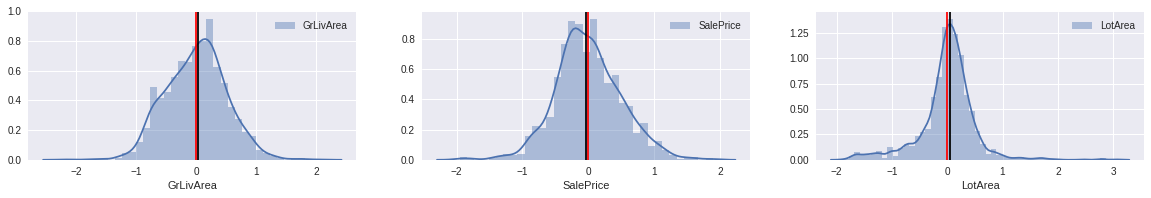

In [7]:
fig = plt.figure(figsize=(20,6))

for i, col in enumerate(features):
    fig.add_subplot(231+i)
    sns.distplot(housing_gelman_df[col], label=col)
    plt.axvline(housing_gelman_df[col].mean(), c='red')
    plt.axvline(housing_gelman_df[col].median(), c='black')
    plt.legend()
# ax.legend(bbox_to_anchor=(1.05, 1), loc=2)

### Original Data Distribution

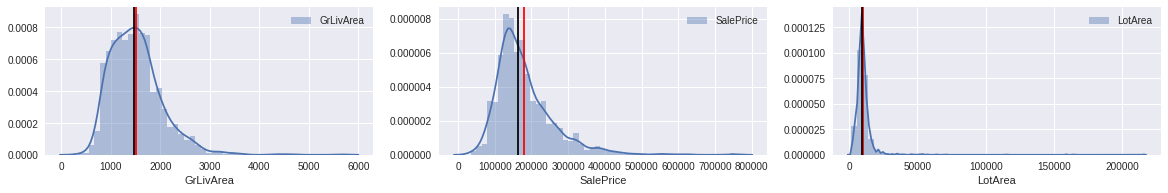

In [8]:
fig = plt.figure(figsize=(20,6))
for i, col in enumerate(features):
    fig.add_subplot(234+i)
    sns.distplot(housing_df[col], label=col)
    plt.axvline(housing_df[col].mean(), c='red')
    plt.axvline(housing_df[col].median(), c='black')
    plt.legend()